# Arranging football players in FIFA 21 by style of play

# Import basic libraries

In [1]:
import pandas as pd
import numpy as np

# Import FIFA 21 dataset

In [2]:
df = pd.read_csv("/Users/alexitzu23/Downloads/archive/players_21.csv")
df.head() #showing the top 5 players in FIFA 21 by overall rating

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


# Extracting only the columns with numeric values

In [3]:
df.describe().columns #numeric variables

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall',
       'potential', 'value_eur', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'menta

In [4]:
df = df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']] 

df.head() #now we have only the columns we need

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,93,93,67500000,560000,5,4,...,75,96,NaN,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,92,92,46000000,220000,5,4,...,84,95,NaN,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,91,93,75000000,125000,3,3,...,11,68,NaN,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,91,91,80000000,240000,4,4,...,88,88,NaN,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,91,91,90000000,270000,5,5,...,92,93,NaN,30,29,9,9,15,15,11


In [5]:
df.shape

(18944, 61)

In [6]:
#Because the dataset have almost 19000 players, we will extract only the highest rated players
df = df[df.overall > 86]
df

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,93,93,67500000,560000,5,4,...,75,96,NaN,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,92,92,46000000,220000,5,4,...,84,95,NaN,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,91,93,75000000,125000,3,3,...,11,68,NaN,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,91,91,80000000,240000,4,4,...,88,88,NaN,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,91,91,90000000,270000,5,5,...,92,93,NaN,30,29,9,9,15,15,11
5,K. De Bruyne,29,181,70,91,91,87000000,370000,4,5,...,84,91,NaN,65,53,15,13,5,10,13
6,K. Mbappé,21,178,73,90,95,105500000,160000,3,4,...,70,84,NaN,34,32,13,5,7,11,6
7,M. ter Stegen,28,187,85,90,93,69500000,260000,3,4,...,25,70,NaN,13,10,88,85,88,88,90
8,V. van Dijk,28,193,92,90,91,75500000,210000,3,3,...,62,90,NaN,93,86,13,10,13,11,11
9,Alisson,27,191,91,90,91,62500000,160000,3,3,...,23,65,NaN,19,16,86,88,85,91,89


# Replace the NULL values with mean

In [7]:
pd.set_option('display.max_rows', 70) 
df.isnull().sum() #initial values

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number          18
pace                          10
shooting                      10
passing                       10
dribbling                     10
defending                     10
physic                        10
gk_diving                     38
gk_handling                   38
gk_kicking                    38
gk_reflexes                   38
gk_speed                      38
gk_positioning                38
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_

In [8]:
df = df.fillna(df.mean())
df.isnull().sum() #final values

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number           0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
gk_diving                      0
gk_handling                    0
gk_kicking                     0
gk_reflexes                    0
gk_speed                       0
gk_positioning                 0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_

In [9]:
#We can see that the defending_marking column still have NULL values, so we will delete it
df = df.drop(['defending_marking'], axis = 1)
df.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attackin

In [10]:
names = df.short_name.tolist() #saving names for later
df = df.drop(['short_name'], axis = 1) #drop the short_name column
df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,33,170,72,93,93,67500000,560000,5,4,4,...,95,75,96,35,24,6,11,15,14,8
1,35,187,83,92,92,46000000,220000,5,4,5,...,82,84,95,32,24,7,11,15,14,11
2,27,188,87,91,93,75000000,125000,3,3,1,...,65,11,68,12,18,87,92,78,90,90
3,31,184,80,91,91,80000000,240000,4,4,4,...,79,88,88,42,19,15,6,12,8,10
4,28,175,68,91,91,90000000,270000,5,5,5,...,90,92,93,30,29,9,9,15,15,11


# Normalize the data

In [11]:
from sklearn import preprocessing
''' Why? Because normalization helps as each variable is scaled differently,
    so it forces all variables to be in the interval (0,1). '''
x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.866667,0.064516,0.25000,1.000000,0.750,0.577778,1.000000,1.000000,0.75,0.75,...,1.000000,0.790123,1.000000,0.301205,0.195122,0.034483,0.089888,0.142857,0.114943,0.057471
1,1.000000,0.612903,0.59375,0.833333,0.625,0.338889,0.288703,1.000000,0.75,1.00,...,0.800000,0.901235,0.967742,0.265060,0.195122,0.045977,0.089888,0.142857,0.114943,0.091954
2,0.466667,0.645161,0.71875,0.666667,0.750,0.661111,0.089958,0.333333,0.50,0.00,...,0.538462,0.000000,0.096774,0.024096,0.121951,0.965517,1.000000,0.835165,0.988506,1.000000
3,0.733333,0.516129,0.50000,0.666667,0.500,0.716667,0.330544,0.666667,0.75,0.75,...,0.753846,0.950617,0.741935,0.385542,0.134146,0.137931,0.033708,0.109890,0.045977,0.080460
4,0.533333,0.225806,0.12500,0.666667,0.500,0.827778,0.393305,1.000000,1.00,1.00,...,0.923077,1.000000,0.903226,0.240964,0.256098,0.068966,0.067416,0.142857,0.126437,0.091954


# Use PCA to reduce 60 columns into 2

In [12]:
from sklearn.decomposition import PCA
''' Why? Because it decreases the complexity of the model and increases computational efficiency. '''
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))
reduced.head()

,0,1
0,-1.411567,-1.246807
1,-1.154927,-0.876349
2,2.946637,-0.525293
3,-1.018325,-0.469440
4,-1.316293,-1.252233


# Execute the K-Means clustering algorithm 


In [13]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=5)
# fit the input data
kmeans = kmeans.fit(reduced)
# get the cluster labels
labels = kmeans.predict(reduced)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()

# Make a new data frame by adding players' names and their cluster

In [14]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.411567,-1.246807,4,L. Messi
1,-1.154927,-0.876349,4,Cristiano Ronaldo
2,2.946637,-0.525293,2,J. Oblak
3,-1.018325,-0.469440,4,R. Lewandowski
4,-1.316293,-1.252233,4,Neymar Jr


# Import data visualization libraries

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Visualization

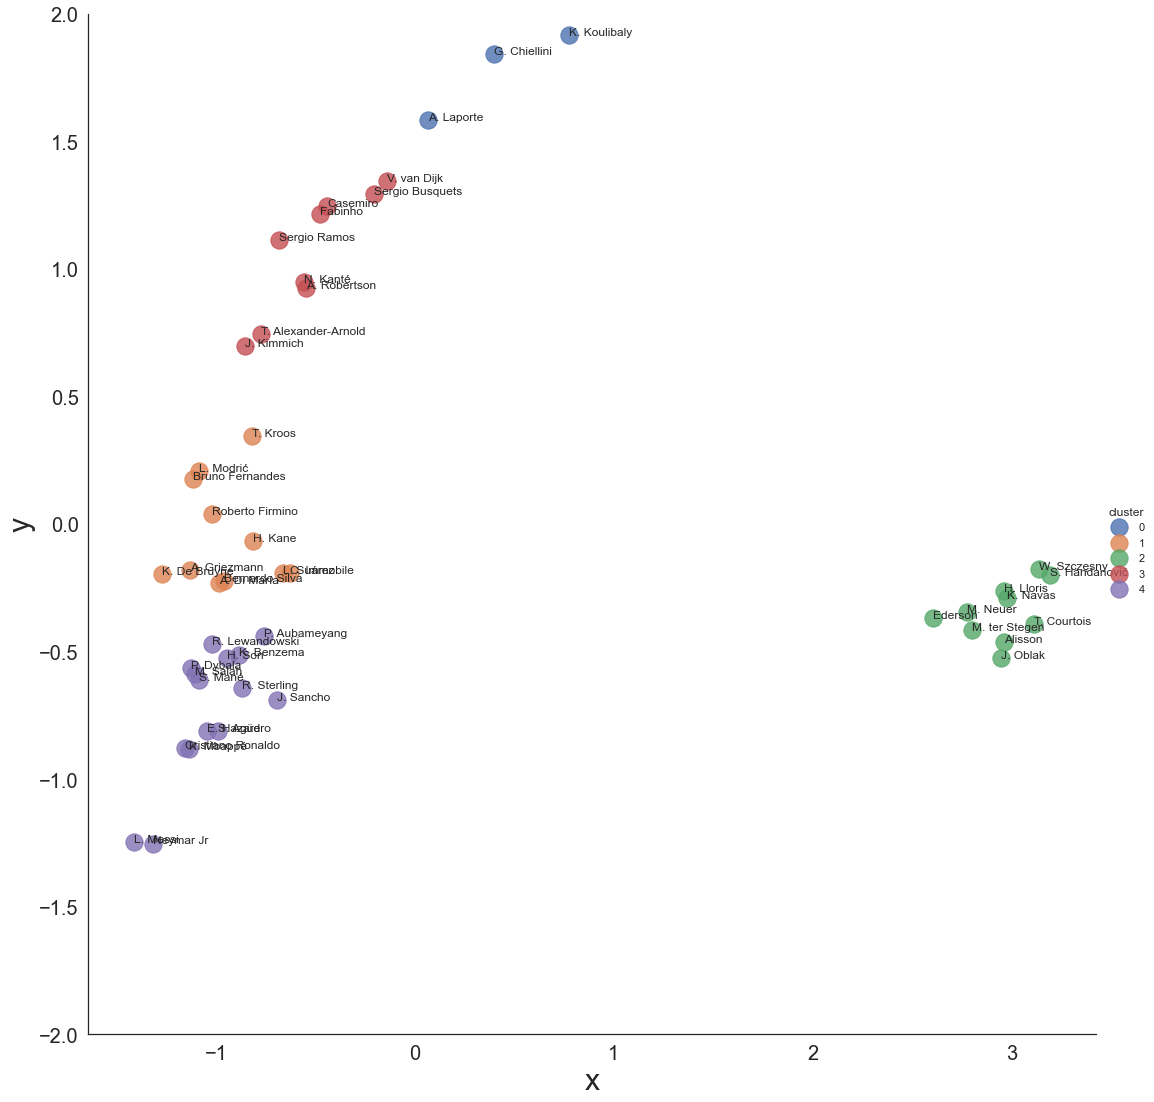

In [22]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=True,
                   fit_reg=False, height = 15, scatter_kws={"s": 300})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize = 20)
plt.xlabel("x", fontsize = 30)
plt.ylabel("y", fontsize = 30)

plt.show()